# Numpy and Pandas


These are workhorse libraries used in data science. and `Pandas` uses `numpy` to allow easy maniuplation of dataframes (essentially little spreadsheet tables)

## Numpy
`Numpy` is a library for numeric calculations. It has very efficient computation functions, especially for arrays. 

In [1]:
import numpy as np

# define array
a = np.array([[1,2],[3,4],[5,6]], dtype = float)
a

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [2]:
# 3x2 array of ones
b = np.ones((3,2), dtype =  float)
b

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [3]:
# element-wise addition of arrays
a + b

array([[2., 3.],
       [4., 5.],
       [6., 7.]])

In [4]:
# add constant to array element-wise
a + 3

array([[4., 5.],
       [6., 7.],
       [8., 9.]])

In [5]:
# add constant to array element-wise
2*a

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

### Reshaping arrays

In [6]:
# make a 1D array

a = np.array(range(8))

print(a)
print("shape:", a.shape)
print("#dimensions:", a.ndim)

[0 1 2 3 4 5 6 7]
shape: (8,)
#dimensions: 1


In [7]:
# reshape it into 2d

a_reshaped = a.reshape(8,1)

print(a_reshaped)
print("shape:", a_reshaped.shape)
print("#dimensions:", a_reshaped.ndim)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
shape: (8, 1)
#dimensions: 2


In [8]:
# reshape it 

a_reshaped = a.reshape(2,4)

print(a_reshaped)
print("shape:", a_reshaped.shape)
print("#dimensions:", a_reshaped.ndim)

[[0 1 2 3]
 [4 5 6 7]]
shape: (2, 4)
#dimensions: 2


## Vectorized operations
Numpy can perform operations MUCH faster that by iterating through arrays one element at a time. We'll see how much faster by comparing numpy's vectorized methods to iterating items in an array using some large arrays of 1,000,000 items each.

In [9]:
# we will use datetime to measure how long the operations take
from datetime import datetime

In [10]:
# Make the arrays

n = 1000000
array_a = np.array(range(n))
print("array_a: ", array_a)

array_b = np.ones(n)
print("array_b: ", array_b)

array_a:  [     0      1      2 ... 999997 999998 999999]
array_b:  [1. 1. 1. ... 1. 1. 1.]


In [11]:
# Add a and b by iterating through arrays
start = datetime.now()

c = []
for a,b in zip(array_a, array_b):
    c.append(a+b)

end = datetime.now()
time_iterate = (end-start).total_seconds()
print(f"Time elapsed: {time_iterate} seconds")

Time elapsed: 0.309651 seconds


In [12]:
# Add a and b using vectorized operation
start = datetime.now()

c = a+b

end = datetime.now()
time_numpy = (end-start).total_seconds()
print(f"Time elapsed: {(end-start).total_seconds()} seconds")

Time elapsed: 0.010265 seconds


In [13]:
print(f"Numpy was {round(time_iterate/time_numpy, 1)} times faster than iterating over the arrays")

Numpy was 30.2 times faster than iterating over the arrays


# Pandas
Pandas is all about working with `Dafaframes`, which are like spredsheets that you can operate on.

In [14]:
import pandas as pd

# define some data in a dictionary
data_dict = {
    "name": ["Alice", "Bob", "Chris", "Desdemona"],
    "age": [25, 18, 33, 12],
    "salary": [2000, 2200, 1500, 4000]
}
df = pd.DataFrame(data_dict)
df

,name,age,salary
0,Alice,25,2000
1,Bob,18,2200
2,Chris,33,1500
3,Desdemona,12,4000


In [15]:
type(df)

pandas.core.frame.DataFrame

#### Access the columns of the dataframe with square brackets
A column is a seperate type called a `Series`

In [16]:
df["name"]

0        Alice
1          Bob
2        Chris
3    Desdemona
Name: name, dtype: object

In [17]:
type(df["name"])

pandas.core.series.Series

#### Define a series then add it to a dataframe

In [18]:
tips = pd.Series([50,100,75,33])

df["tips"] = tips
df

,name,age,salary,tips
0,Alice,25,2000,50
1,Bob,18,2200,100
2,Chris,33,1500,75
3,Desdemona,12,4000,33


#### Create a new column based on other columns

In [19]:
df["total_pay"] = df["salary"] + df["tips"]
df

,name,age,salary,tips,total_pay
0,Alice,25,2000,50,2050
1,Bob,18,2200,100,2300
2,Chris,33,1500,75,1575
3,Desdemona,12,4000,33,4033


#### Sort by a column

In [20]:
# sort by total pay, descending
df.sort_values("total_pay", ascending = False)

,name,age,salary,tips,total_pay
3,Desdemona,12,4000,33,4033
1,Bob,18,2200,100,2300
0,Alice,25,2000,50,2050
2,Chris,33,1500,75,1575


### Save dataframe to disk

In [21]:
path = "temp/earnings.csv"
df.to_csv(path, index = False) # index = False prevents the index column from being saved

### Load data from csv files

In [22]:
df = pd.read_csv("data/canucks2023-24.csv")
df

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,G(EV),...,ATOI,OPS,DPS,PS,BLK,HIT,FOW,FOL,FO%,-9999
0,J.T. Miller,30,C,81,37,66,103,32,58,25,...,19:29,9.0,2.7,11.7,61,217,823,638,56.3,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,12,...,24:41,7.9,6.5,14.4,55,29,0,0,NaN,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,21,...,19:39,7.3,2.3,9.6,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,24,...,18:36,6.6,2.3,9.0,29,56,13,12,52.0,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,3,...,23:26,2.7,5.9,8.6,87,104,0,0,NaN,hronefi01
5,Conor Garland,27,RW,82,20,27,47,19,35,19,...,14:32,3.1,1.9,5.0,34,53,2,8,20.0,garlaco01
6,Nils Höglander,23,LW,80,24,12,36,23,51,24,...,12:06,3.1,1.8,4.8,19,100,0,0,NaN,hoglani01
7,Dakota Joshua,27,C,63,18,14,32,19,60,17,...,14:23,2.3,1.6,3.9,40,245,34,38,47.2,joshuda01
8,Ilya Mikheyev,29,F,78,11,20,31,1,4,11,...,14:16,0.9,1.1,2.1,20,49,8,21,27.6,mikheil01
9,Pius Suter,27,F,67,14,15,29,17,16,12,...,15:30,1.2,1.6,2.9,23,54,186,191,49.3,suterpi01


### Dataframe cleanup
Often a dataframe has unwanted columns, missing data, etc that you want to clean up.

In [23]:
# Look at the previous dataframe's first rows using `head()`
df.head(6)

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,G(EV),...,ATOI,OPS,DPS,PS,BLK,HIT,FOW,FOL,FO%,-9999
0,J.T. Miller,30,C,81,37,66,103,32,58,25,...,19:29,9.0,2.7,11.7,61,217,823,638,56.3,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,12,...,24:41,7.9,6.5,14.4,55,29,0,0,NaN,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,21,...,19:39,7.3,2.3,9.6,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,24,...,18:36,6.6,2.3,9.0,29,56,13,12,52.0,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,3,...,23:26,2.7,5.9,8.6,87,104,0,0,NaN,hronefi01
5,Conor Garland,27,RW,82,20,27,47,19,35,19,...,14:32,3.1,1.9,5.0,34,53,2,8,20.0,garlaco01


### Selecting columns

In [24]:
# there are lots of columns
df.columns

Index(['Player', 'Age', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'G(EV)',
       'G(PP)', 'G(SH)', 'G(GW)', 'A(EV)', 'A(PP)', 'A(SH)', 'S', 'S%', 'TOI',
       'ATOI', 'OPS', 'DPS', 'PS', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', '-9999'],
      dtype='object')

In [25]:
# we can specify which of those columns you want to keep
cols_to_keep = ['Player', 'Age', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM',
                'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', '-9999']

# redefine the dataframe to be just those columns
df = df[cols_to_keep]
df.head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999
0,J.T. Miller,30,C,81,37,66,103,32,58,194,19.1,1579,19:29,61,217,823,638,56.3,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,199,8.5,2024,24:41,55,29,0,0,NaN,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,207,16.4,1611,19:39,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,19.6,1507,18:36,29,56,13,12,52.0,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,148,3.4,1899,23:26,87,104,0,0,NaN,hronefi01


### Rename columns
It's pretty clear the last column (`-9999`) is some kind of codename for each player so let's rename it to `codename`

In [26]:
df = df.rename(columns = {"-9999": "codename"})
df.head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
0,J.T. Miller,30,C,81,37,66,103,32,58,194,19.1,1579,19:29,61,217,823,638,56.3,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,199,8.5,2024,24:41,55,29,0,0,NaN,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,207,16.4,1611,19:39,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,19.6,1507,18:36,29,56,13,12,52.0,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,148,3.4,1899,23:26,87,104,0,0,NaN,hronefi01


### Dropping null values
If we want to compare stats for faceoff percentage (`FO%`) you will notice that several players have `NaN` (Not a Number) values. This is presumably because they never took any faceoffs so the percentage is undefined.

In [27]:
# get a dataframe of booleans saying whether each cell is NaN
df.isna().head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [28]:
# drop any rows (axis = 0) that contain null values
df.dropna(axis = 0).head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
0,J.T. Miller,30,C,81,37,66,103,32,58,194,19.1,1579,19:29,61,217,823,638,56.3,millejt01
2,Elias Pettersson,25,C,82,34,55,89,20,12,207,16.4,1611,19:39,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,19.6,1507,18:36,29,56,13,12,52.0,boesebr01
5,Conor Garland,27,RW,82,20,27,47,19,35,200,10.0,1192,14:32,34,53,2,8,20.0,garlaco01
7,Dakota Joshua,27,C,63,18,14,32,19,60,84,21.4,906,14:23,40,245,34,38,47.2,joshuda01


In [29]:
# you could also drop any columns (axis = 1) that contain null values
df.dropna(axis = 1).head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,TOI,ATOI,BLK,HIT,FOW,FOL,codename
0,J.T. Miller,30,C,81,37,66,103,32,58,194,1579,19:29,61,217,823,638,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,199,2024,24:41,55,29,0,0,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,207,1611,19:39,68,125,406,393,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,1507,18:36,29,56,13,12,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,148,1899,23:26,87,104,0,0,hronefi01


## Indexing and selecting subsets of a dataframe
You can access a cell by its (row,column) using `df.loc[row_name, col_name]` or  `df.iloc[row_index, col_index]` (the `i` stands for *index*)


In [30]:
# the first (zero-indexed) row, "Player" column
df.loc[0,"Player"]

'J.T. Miller'

In [31]:
# the first (zero-indexed) row, first (zero-indexed) column
df.iloc[0,0]

'J.T. Miller'

In [32]:
# the first 4 rows, all columns
df.loc[0:4]

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
0,J.T. Miller,30,C,81,37,66,103,32,58,194,19.1,1579,19:29,61,217,823,638,56.3,millejt01
1,Quinn Hughes,24,D,82,17,75,92,38,38,199,8.5,2024,24:41,55,29,0,0,NaN,hughequ01
2,Elias Pettersson,25,C,82,34,55,89,20,12,207,16.4,1611,19:39,68,125,406,393,50.8,petteel01
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,19.6,1507,18:36,29,56,13,12,52.0,boesebr01
4,Filip Hronek,26,D,81,5,43,48,33,38,148,3.4,1899,23:26,87,104,0,0,NaN,hronefi01


In [33]:
# the first 4 rows, ["Player", "PTS"] columns
df.loc[0:4, ["Player", "PTS"]]

,Player,PTS
0,J.T. Miller,103
1,Quinn Hughes,92
2,Elias Pettersson,89
3,Brock Boeser,73
4,Filip Hronek,48


In [34]:
# setting a condition will return an array of booleans indicating if the condition is true for each row
df["Player"]=="Brock Boeser"

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: Player, dtype: bool

In [35]:
# use this array of booleans to select only Brock Boeser
df.loc[df["Player"]=="Brock Boeser"]

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
3,Brock Boeser,26,RW,81,40,33,73,23,14,204,19.6,1507,18:36,29,56,13,12,52.0,boesebr01


## Mini-analysis
I'm wondering if defenders who score more points are less likely to block shots. Let's do some cleaning and calculations to see if there is any evidence for this.

In [36]:
# Select only defenders and set as its own dataframe
df_defense = df.loc[df["Pos"]=="D"].copy()  # this .copy() is not strictly necessary, but it prevents some warnings in the next cell
df_defense

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,codename
1,Quinn Hughes,24,D,82,17,75,92,38,38,199,8.5,2024,24:41,55,29,0,0,NaN,hughequ01
4,Filip Hronek,26,D,81,5,43,48,33,38,148,3.4,1899,23:26,87,104,0,0,NaN,hronefi01
10,Tyler Myers,33,D,77,5,24,29,16,77,93,5.4,1459,18:57,136,110,0,0,NaN,myersty01
14,Nikita Zadorov,28,D,54,5,9,14,6,102,61,8.2,922,17:04,49,124,0,0,NaN,zadorni01
16,Ian Cole,34,D,78,2,9,11,10,61,61,3.3,1458,18:41,166,83,0,0,NaN,coleia01
20,Noah Juulsen,26,D,54,1,6,7,-1,22,30,3.3,804,14:54,85,164,0,0,NaN,juulsno01
21,Carson Soucy,29,D,40,2,4,6,10,12,29,6.9,699,17:29,64,65,0,0,NaN,soucyca01
26,Mark Friedman,28,D,23,0,1,1,4,21,16,0.0,281,12:14,35,33,0,0,NaN,friedma01
28,Akito Hirose,24,D,3,0,0,0,1,0,0,NaN,36,12:06,5,3,0,0,NaN,hirosak01
30,Cole McWard,22,D,1,0,0,0,0,0,1,0.0,9,9:05,0,0,0,0,NaN,mcwarco01


In [37]:
# calculate points per game among defensemen (round to 2 decimal places)
df_defense["PTS/GP"] = (df_defense["PTS"] / df_defense["GP"]).round(2)

# calculate blocked shots per game among defensemen
df_defense["BLK/GP"] = (df_defense["BLK"] / df_defense["GP"]).round(2)

# sort by BLK/GP in descending order, and show just "Player", "PTS/GP", "BLK/GP" columns
df_defense.sort_values("BLK/GP", ascending = False)[["Player", "BLK/GP", "PTS/GP"]]

,Player,BLK/GP,PTS/GP
16,Ian Cole,2.13,0.14
10,Tyler Myers,1.77,0.38
28,Akito Hirose,1.67,0.00
21,Carson Soucy,1.60,0.15
20,Noah Juulsen,1.57,0.13
26,Mark Friedman,1.52,0.04
4,Filip Hronek,1.07,0.59
14,Nikita Zadorov,0.91,0.26
1,Quinn Hughes,0.67,1.12
30,Cole McWard,0.00,0.00


# Plotting
Now that we've manipulated the data for defensemen, let's visualize it to see if there is a pattern.

There are many plotting libraries out there so let's try out a few. These include:
- **Matplotlib**: The classic and most widely used library. Steep learning curve. If you can dream it, it can be made with matplotlib, but it might get ugly.
- **Plotly**: More modern and easier to make attractive and interactive plots, but plots use more memory and can get bogged down with lots of data. 

## Matplotlib
There are a few ways of using matplotlib, the `axes` or the `pyplot` interface. Both are ugly and very manual.

In [38]:
import matplotlib.pyplot as plt

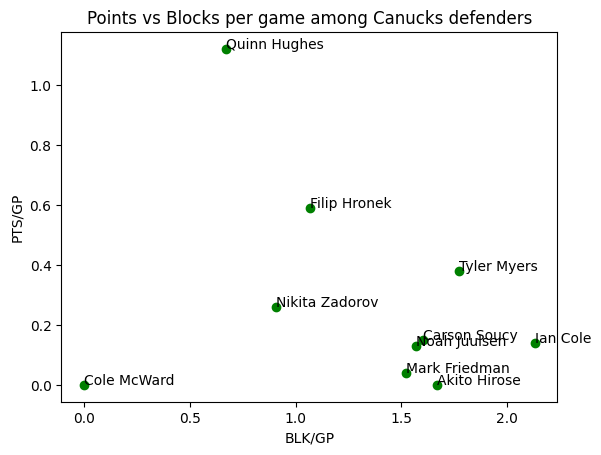

In [39]:
# using the pyplot interface
x = df_defense["BLK/GP"]
y = df_defense["PTS/GP"]
players = df_defense["Player"]

# plot points
plt.scatter(x, y, color='green')

# add text labels by iterating
for xval, yval, player in zip(x,y, players):
    plt.annotate(player, xy=(xval, yval))

# Format axis labels and title
plt.xlabel("BLK/GP")
plt.ylabel("PTS/GP")
plt.title("Points vs Blocks per game among Canucks defenders");

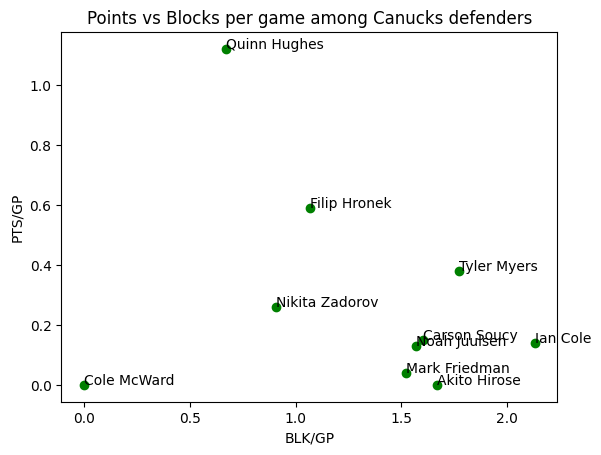

In [40]:
# Using the axes interface

x = df_defense["BLK/GP"]
y = df_defense["PTS/GP"]
players = df_defense["Player"]

# instantiate figure and axis
fig, ax = plt.subplots()

# plot points on axis
ax.scatter(x, y, color="green")

# add text labels by iterating
for xval, yval, player in zip(x,y, players):
    ax.annotate(player, xy=(xval, yval))

# Format axis labels and title
ax.set_xlabel("BLK/GP");
ax.set_ylabel("PTS/GP");
ax.set_title("Points vs Blocks per game among Canucks defenders");

## Plotly
Plotly can be used with a few different APIs:
- `plotly.express`: high-level, easy, integrates well with pandas dataframes, but not very customizable
- `plotly.graph_objects`:low-level, so more customixable, but harder to learn

Both will produce interactive plots with zoom, pan, hover labels, etc.

In [55]:
# These imports are needed to display plotly plots in Jupyter notebooks
import plotly.io as pio
pio.renderers.default = 'iframe'

In [56]:
import plotly.express as px

fig = px.scatter(df_defense, x = "BLK/GP", y = "PTS/GP", text = "Player", 
                 width=800, height = 600, title = "Points vs Blocks per game among Canucks defenders")
fig.update_traces(textposition='top center')
fig.show()

In [57]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, text = players, mode='markers+text'))
fig.update_traces(textposition='top center')
fig.update_layout(width = 800, height = 600, 
                  title = "Points vs Blocks per game among Canucks defenders",
                  xaxis_title = "BLK/GP", 
                  yaxis_title = "PTS/GP")
fig.show()